In [2]:
from IPython.display import display, Math

import sympy as sp
from sympy import symbols, latex, Eq, pi

# Overview

- Despite introducing a model with compliant linkers, Holzapfel et al. 2014 do not explicitly present the first and second derivatives of the free energy, $w^{\prime}$ and $w^{\prime\prime}$, respectively. Small changes are required to the $\beta$-model to account for the linker's influence.

- Force-stretch relation for extensible filaments - extensible $\beta$-model:

\begin{equation}
\notag
\frac{\lambda \lambda_0 r_0}{L} = 1+\frac{f}{\mu_0} - \frac{(1+2f/\mu_0)(1+f/\mu_0)^\beta (1-r_0 / L)}{[1+fL^2/(\pi^2B_0)+f^2L^2/(\pi^2B_0\mu_0)]^\beta}
\end{equation}

- Introducing compliant linkers and a compound filament, the relation is still valid, but requires a change in notation by adding the subscript $f$, as it is only related to the actin filament (Holzapfel et al. 2014 present the inextensible equations in that notation, but not for extensible filaments):

\begin{equation}
\frac{\lambda_f \lambda_{0,f} r_{0,f}}{L} = 1+\frac{f}{\mu_0} - \frac{(1+2f/\mu_0)(1+f/\mu_0)^\beta (1-r_{0,f} / L)}{[1+fL^2/(\pi^2B_0)+f^2L^2/(\pi^2B_0\mu_0)]^\beta}
\end{equation}

- In Section 3 we confirm that, despite having a free energy in the form $w(\lambda) = w_f(\lambda_f) + w_c(\lambda_c)$, its first derivative wrt stretch $\lambda$ is still:

\begin{equation}
\notag
w'(\lambda) = f r_0 \lambda_0
\end{equation}

- In Section 4 we present the second derivative wrt stretch $\lambda$:

\begin{equation}
\notag
w^{\prime \prime}=\frac{\eta \lambda_{0,f} \lambda_{0} r_{0}^{2} \mu_{0} / L}{1+Y\left(\frac{1+\alpha f^{*}}{1+f^{*}+\alpha f^{*^{2}}}\right)^{\beta}\left(1-r_{0,f} / L\right)}
\end{equation}

with $Y$ being the same expression presented in Unterberger 2013. **To sum up, we just multiply the expression for $w^{\prime \prime}$ without linkers by $d \lambda_f / d \lambda = \eta r_0 / r_{0,f}$ and replace $r_0$ with $r_{0,f}$ in the denominator.**

- At last, in Section 5 it is noted that the dimensionless ${w^*}^{\prime \prime}$ presented in Holzapfel 2014 is missing a $\delta$ in the numerator.

# Filament Relations - $f, w^{\prime}, w^{\prime\prime}$

## 1. Inextensible without crosslinkers

Explicit Force-Stretch relation for an inextensible filament: 

\begin{equation}
\tag{1}
f(\lambda) = \frac{\pi^2 B_0}{L^2} \left[ \left( \frac{a-1}{a-\lambda} \right)^{1/\beta} -1 \right]
\end{equation}

The filament force can also be expressed as $f = \partial w / \partial r$, which by the chain rule leads to:

$f = \frac{\partial w}{\partial r} = \frac{\partial w}{\partial \lambda} \cdot \frac{\partial \lambda}{\partial r} \Leftrightarrow f = \frac{\partial w}{\partial \lambda} \cdot \frac{\partial (r/\lambda_0 r_0)}{\partial r}$.

Simply yielding:

\begin{equation}
\tag{2}
w^{\prime} = \frac{\partial w}{\partial \lambda} = f r_0 \lambda_0.
\end{equation}

This is valid for extensible filaments as well.

As for the second derivative $w^{\prime\prime}$, it can be readily obtained by differentiating $w^{\prime}$ with respect to $\lambda$:

$w^{\prime\prime} = \frac{\partial^2 w}{\partial \lambda^2} = \frac{\partial w^{\prime}}{\partial \lambda} = r_0 \lambda_0 \frac{\partial f}{\partial \lambda}$. Deriving $f$ w.r.t. $\lambda$ leads to the expression below:


In [3]:
# Define symbols
B0, L, a, beta, r0, lambda0 = sp.symbols('B0 L a beta, r0, lambda0', constant = True)
stretch = sp.symbols('lambda')
# f = sp.Function('f')(r)

# Define force function
f_in = pi**2 * B0 / L**2 * ( ((a-1)/(a-stretch))**(1/beta) - 1)

# Compute df / dlambda
df_dl = sp.diff(f_in, stretch)

# Simplify the result
df_dl_simplified = sp.simplify(df_dl)

# Display expression
display(Math(r"\frac{d f}{d \lambda} = " + latex(df_dl_simplified)))

# Second derivative
ddw = df_dl_simplified * r0 * lambda0

<IPython.core.display.Math object>

In [4]:
display(Math(r"w^{\prime\prime} = " + latex(ddw)))


<IPython.core.display.Math object>

Which matches the expression presented in the Appendix of Holzapfel et al. 2014 [paper that introduces compliant linkers].

## 2. Extensible without crosslinkers

The first derivative $w^{\prime}$ is the same as for inextensible filaments, since it does not depend on the specific form of $f(\lambda)$.

However, since there is no explicit expression for $f(\lambda)$, the second derivative $w^{\prime\prime}$ cannot be obtained in the same way as for inextensible filaments.

The Force-Stretch relation for extensible filaments follows as:

\begin{equation}
\tag{3}
\frac{\lambda \lambda_0 r_0}{L} = 1+\frac{f}{\mu_0} - \frac{(1+2f/\mu_0)(1+f/\mu_0)^\beta (1-r_0 / L)}{[1+fL^2/(\pi^2B_0)+f^2L^2/(\pi^2B_0\mu_0)]^\beta}
\end{equation}

Which can be rearranged into the form $H(\lambda, f(\lambda)) = 0$ or $H(\lambda, w^\prime(\lambda)) = 0$. Thus, the second derivative can be obtained by implicit differentiation:

$\frac{dH}{d\lambda} = 0 \Leftrightarrow \frac{\partial H}{\partial \lambda} + \frac{\partial H}{\partial w^\prime} \cdot \frac{\partial w^\prime}{\partial \lambda} = 0 \Leftrightarrow w^{\prime\prime} = -\frac{\partial H / \partial \lambda}{\partial H / \partial w^\prime}$


In [5]:
# Define symbols
lmbda, lmbda0, r0, L, f, mu0, beta, B0, dw, aff = symbols('lambda lambda0 r0 L f mu0 beta B0 w^{\\prime} aff')

# Numerator and denominator for the fractional part
f = dw/(r0 * lmbda0)
numerator = (1 + 2*f/mu0) * (1 + f/mu0)**beta * (1 - r0/L)
denominator = (1 + f*L**2/(pi**2 * B0) + f**2 * L**2/(pi**2 * B0 * mu0))**beta

H = (lmbda * lmbda0 * r0 / L) - 1 - (f / mu0) + (numerator / denominator)

# Equation in the form H(lambda, f) = 0
equation = Eq(H, 0)
display(Math(r"H(\lambda, f) = " + latex(equation.lhs) + r"= 0"))

# Partial derivative of H wrt lambda
dH_dl = sp.diff(H, lmbda)
display(Math(r"\frac{\partial H}{\partial \lambda} = " + latex(dH_dl)))

# Partial derivative of H wrt w'
dH_dw = sp.diff(H, dw)
display(Math(r"\frac{\partial H}{\partial w^{\prime}} = " + latex(dH_dw)))

# Second derivative w''
ddw =  - dH_dl / dH_dw
ddw_simplified = sp.simplify(ddw)
display(Math(r"w^{\prime\prime} = " + latex(ddw_simplified)))

# Replace dw/(lambda0 * r0) by aff
expr_to_replace = dw
ddw_simplified = ddw_simplified.xreplace({expr_to_replace: aff*r0*lmbda0})
# ddw_simplified = sp.simplify(ddw_simplified)
display(Math(r"w^{\prime\prime} = " + latex(ddw_simplified)))
# aff = f * r0 * lambda0
# ddw_final = ddw_simplified.subs(sp.symbols('w^{\\prime}'), dw)
# ddw_final_simplified = sp.simplify(ddw_final)
# display(Math(r"w^{\prime\prime} = " + latex(ddw_final_simplified)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
'''FIND COMMON SUBEXPRESSIONS'''

replace, reduced = sp.cse(ddw_simplified)
print("Replacements:")
for r in replace:
    print(f"{r[0]} = {r[1]}")
print("\nReduced expression:")
display(Math(r"w^{\prime\prime} = " + latex(reduced[0])))

Replacements:
x0 = L**2
x1 = lambda0*r0
x2 = aff*x1
x3 = mu0*x1
x4 = x2 + x3
x5 = 2*x2 + x3
x6 = 1/mu0
x7 = (x4*x6/(lambda0*r0))**beta*(L - r0)
x8 = beta*x7
x9 = pi**2
x10 = lambda0**2
x11 = r0**2
x12 = x10*x11
x13 = mu0*x12
x14 = x0*x12
x15 = B0*x13*x9 + aff**2*x14 + aff*mu0*x14
x16 = x15*x4
x17 = x16*(x15*x6/(B0*x10*x11*x9))**beta

Reduced expression:


<IPython.core.display.Math object>

By lengthy (hand) substitutions, taking advantage of the CSE, it **matches the expression presented in Unterberger et al. 2013**. 

## 3. Inextensible with crosslinkers

The following scheme translates the compound with a crosslinker and an actin filament, placed in series.

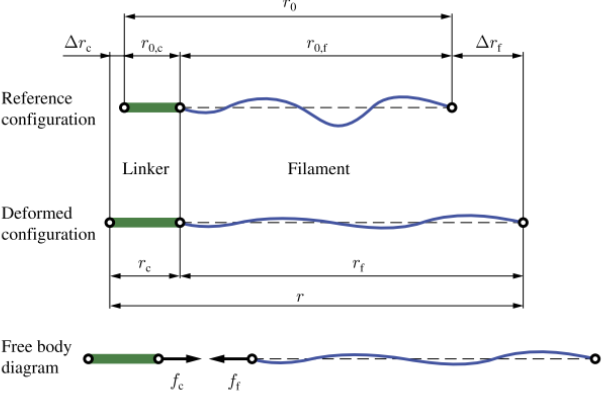

Now, the explicit force-stretch relation in equation (1) refers to the stretch applied to the actin filament only $\lambda_f$:

\begin{equation}
\tag{4}
f(\lambda_f) = \frac{\pi^2 B_0}{L^2} \left[ \left( \frac{a-1}{a-\lambda_f} \right)^{1/\beta} -1 \right]
\end{equation}

In the model without crosslinkers, $a = L / r_0$. The question now arises as to keep that definition or replace $r_0$ with $r_{0,f}$.
It makes sense that we replace $r_0$ with $r_{0,f}$, as this quantity is derived for the actin filaments, based on $L$ and the concentration of crosslinkers. So it (most likely) wouldn't be correct to include the crosslinker contribution to the definition of $a$.

The filament stretch $\lambda_f$ in (4) is:

\begin{equation}
\tag{5}
\lambda_f = \eta \frac{r_{0}}{r_{0,f}} (\lambda - 1) + 1
\end{equation}

The first derivative of the free energy is computed the same way as before. Still, we can derive it from the definition presented in Holzapfel et al. 2014.

\begin{equation}
\tag{6}
w(\lambda) = w_f(\lambda_f) + w_c(\lambda_c) \Leftrightarrow \\
\frac{\partial w(\lambda)}{\partial r} = \frac{\partial w_f(\lambda_f)}{\partial r} + \frac{\partial w_c(\lambda_c)}{\partial r} \Leftrightarrow \\
\frac{\partial w(\lambda)}{\partial \lambda} \cdot \frac{\partial \lambda}{\partial r} = \frac{\partial w_f(\lambda_f)}{\partial r_f} \cdot \frac{\partial r_f}{\partial r} + \frac{\partial w_c(\lambda_c)}{\partial r_c} \cdot \frac{\partial r_c}{\partial r} \\
\end{equation}

Knowing that $f = \partial w / \partial r$ and $f = f_f = f_c$, we can write $f = \partial w / \partial r = \partial w_f / \partial r_f = \partial w_c / \partial r_c$, because the (same) force can be computed by using individually each part of the compound. 

In addition, the definition $\Delta r_f = \eta \Delta r$ allows us to obtain the partial derivatives $\frac{\partial r_f}{\partial r} = \eta$ and $\frac{\partial r_c}{\partial r} = (1-\eta)$.

All these definitions can be replaced in equation (6.3):

\begin{equation}
\tag{7}
w^{\prime} \frac{1}{\lambda_0 r_0} = f \cdot \eta + f \cdot (1-\eta) \Leftrightarrow \\
w^{\prime} = f \lambda_0 r_0
\end{equation}

Leading us to equation (2), as expected. Note that $\lambda_0$ and $r_0$ are related to the compound and not only to the actin filament.

Now, the second derivative is:

\begin{equation}
\tag{8}
w^{\prime\prime} = \frac{\partial w^{\prime}}{\partial \lambda} =  \frac{\partial \left( \lambda_0 r_0 f \right)}{\lambda} = \lambda_0 r_0 \frac{\partial f}{\partial \lambda}
\end{equation}

In [7]:
''' OBTAINING DF/DLAMBDA DIRECTLY '''

# Define symbols
B0, L, a, beta, r0, lmbda0, r0f, eta = sp.symbols('B0 L a beta, r0, lambda0, r_0f, eta', constant = True)
lmbda, lmbdaf = sp.symbols('lambda lambda_f')

# Define force function
lmbdaf = eta * r0 / r0f * (lmbda - 1) + 1
f_in = pi**2 * B0 / L**2 * ( ((a-1)/(a-lmbdaf))**(1/beta) - 1)

# Compute df / dlambda
df_dl = sp.diff(f_in, lmbda)

# Simplify the result
df_dl_simplified = sp.simplify(df_dl)

# Display expression
display(Math(r"\frac{d f}{d \lambda} = " + latex(df_dl_simplified)))

# Second derivative
ddw = df_dl_simplified * r0 * lmbda0

<IPython.core.display.Math object>

In [8]:
# Display expression
display(Math(r"w^{\prime \prime} = " + latex(ddw)))

<IPython.core.display.Math object>

This is the same expression that will be obtained below, where we'll use $\frac{\partial f}{\partial \lambda} = \frac{\partial f}{\partial \lambda_f} \cdot \frac{\partial \lambda_f}{\partial \lambda}$, which leads to a simpler symbolic expression using sympy, without any further rearrangement.

In [9]:
''' COMPUTING DF/DLAMBDA = DF/DLAMBDAF * DLAMBDAF/DLAMBDA '''

# Define symbols
B0, L, a, beta, r0, lmbda0, r0f, eta, lmbdaf = sp.symbols('B0 L a beta, r0, lambda0 r_0f eta lambda_f', constant = True)
lmbda, lf = sp.symbols('lambda lf')

# Define force function
f_in = pi**2 * B0 / L**2 * ( ((a-1)/(a-lmbdaf))**(1/beta) - 1)
lf = eta * r0 / r0f * (lmbda - 1) + 1

# Compute df / dlambda
df_dlf = sp.diff(f_in, lmbdaf)
dlf_dl = sp.diff(lf, lmbda)

# Simplify the result
df_dl = df_dlf * dlf_dl
df_dl_simplified = sp.simplify(df_dl)

# Display expression
display(Math(r"\frac{d f}{d \lambda_f} = " + latex(df_dlf)))
display(Math(r"\frac{d \lambda_f}{d \lambda} = " + latex(dlf_dl)))
display(Math(r"\frac{d f}{d \lambda} = " + latex(df_dl_simplified)))

# Second derivative
ddw = df_dl_simplified * r0 * lmbda0

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
display(Math(r"w^{\prime \prime} = " + latex(ddw)))

<IPython.core.display.Math object>

For the special case $\eta = 1$ and $r_0 = r_{0,f}$ (case where there is no crosslinker), the equation reduces to what we obtained in Section 1.


## 4. Extensible with crosslinkers

$w^{\prime}$ is the same as for inextensible filaments, since it does not depend on the specific form of $f(\lambda)$.

$w^{\prime\prime}$ can be obtained using implicit differentiation as described in Section 2.

The subscript $f$ must be introduced in the Force-Stretch relation for extensible filaments, since equation (3) refers only to the actin filament and not the overall compound. Thus, we have:

\begin{equation}
\tag{9}
\frac{\lambda_f \lambda_{0,f} r_{0,f}}{L} = 1+\frac{f}{\mu_0} - \frac{(1+2f/\mu_0)(1+f/\mu_0)^\beta (1-r_{0,f} / L)}{[1+fL^2/(\pi^2B_0)+f^2L^2/(\pi^2B_0\mu_0)]^\beta}
\end{equation}

Which can be rearranged into the form $H(\lambda_f(\lambda), f(\lambda)) = 0$ or $H(\lambda_f(\lambda), w^\prime(\lambda)) = 0$. Thus, the second derivative can be obtained by implicit differentiation:

$\frac{dH}{d\lambda} = 0 \Leftrightarrow \frac{\partial H}{\partial \lambda_f} \cdot \frac{\partial \lambda_f}{\partial \lambda} + \frac{\partial H}{\partial w^\prime} \cdot \frac{\partial w^\prime}{\partial \lambda} = 0 \Leftrightarrow w^{\prime\prime} = -\frac{\partial H / \partial \lambda_f}{\partial H / \partial w^\prime} \cdot \left( \partial \lambda_f / \partial \lambda \right)$

We've seen above the results of these 3 derivatives (without subscript $f$), with 2 of them being very straightforward:

$\frac{d \lambda_f}{d \lambda} = \eta \frac{r_{0}}{r_{0,f}}$

$\frac{d H}{d \lambda_f} = \frac{\lambda_{0,f}r_{0,f}}{L}$

Still, we'll confirm all 3 below.

In [11]:
# Define symbols
lmbda, lmbdaf, lmbda0, lmbda0f, r0, r0f, L, f, mu0, beta, B0, dw, aff, eta = symbols('lambda lambda_f lambda_0 lambda_0f r_0 r_0f L f mu_0 beta B_0 w^{\\prime} aff eta')

# Numerator and denominator for the fractional part
f = dw/(r0 * lmbda0)
numerator = (1 + 2*f/mu0) * (1 + f/mu0)**beta * (1 - r0f/L)
denominator = (1 + f*L**2/(pi**2 * B0) + f**2 * L**2/(pi**2 * B0 * mu0))**beta

H = (lmbdaf * lmbda0f * r0f / L) - 1 - (f / mu0) + (numerator / denominator)

# Equation in the form H(lambda, f) = 0
equation = Eq(H, 0)
display(Math(r"H(\lambda, f) = " + latex(equation.lhs) + r"= 0"))


# Partial derivative of H wrt lambdaf
dH_dlf = sp.diff(H, lmbdaf)
display(Math(r"\frac{\partial H}{\partial \lambda_f} = " + latex(dH_dlf)))

# Partial derivative of H wrt w'
dH_dw = sp.diff(H, dw)
display(Math(r"\frac{\partial H}{\partial w^{\prime}} = " + latex(dH_dw)))

lmbdaf = eta * r0 / r0f * (lmbda - 1) + 1 
# Derivative of lambdaf wrt to lambda
dlmbdaf_dlmbda = sp.diff(lmbdaf, lmbda)
display(Math(r"\frac{d \lambda_f}{d \lambda} = " + latex(dlmbdaf_dlmbda)))

# Second derivative w''
ddw =  - dH_dlf / dH_dw * dlmbdaf_dlmbda
ddw_simplified = sp.simplify(ddw)
display(Math(r"w^{\prime\prime} = " + latex(ddw_simplified)))

# Replace dw/(lambda0 * r0) by aff
expr_to_replace = dw
ddw_simplified = ddw_simplified.xreplace({expr_to_replace: aff*r0*lmbda0})
# ddw_simplified = sp.simplify(ddw_simplified)
display(Math(r"w^{\prime\prime} = " + latex(ddw_simplified)))
# aff = f * r0 * lambda0
# ddw_final = ddw_simplified.subs(sp.symbols('w^{\\prime}'), dw)
# ddw_final_simplified = sp.simplify(ddw_final)
# display(Math(r"w^{\prime\prime} = " + latex(ddw_final_simplified)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
'''FIND COMMON SUBEXPRESSIONS'''

replace, reduced = sp.cse(ddw_simplified)
print("Replacements:")
for r in replace:
    print(f"{r[0]} = {r[1]}")
print("\nReduced expression:")
display(Math(r"w^{\prime\prime} = " + latex(reduced[0])))

Replacements:
x0 = r_0**2
x1 = L**2
x2 = lambda_0*r_0
x3 = aff*x2
x4 = mu_0*x2
x5 = x3 + x4
x6 = 2*x3 + x4
x7 = 1/mu_0
x8 = (x5*x7/(lambda_0*r_0))**beta*(L - r_0f)
x9 = beta*x8
x10 = pi**2
x11 = lambda_0**2
x12 = x0*x11
x13 = x1*x12
x14 = B_0*mu_0*x10*x12 + aff**2*x13 + aff*mu_0*x13
x15 = x14*x5
x16 = x15*(x14*x7/(B_0*x0*x10*x11))**beta

Reduced expression:


<IPython.core.display.Math object>

Rearranging this expression gives us:

\begin{equation}
\notag
{w^*}^{\prime \prime}_{\mathrm{with~} CL} = \eta \frac{r_0}{r_{0,f}} \cdot {w^*}^{\prime \prime}_{\mathrm{without~} CL}
\end{equation}

We also need to replace $r_0 \rightarrow r_{0,f}$ in the denominator of ${w^*}^{\prime \prime}_{\mathrm{without~} CL}$, so that we have the term $(1-r_{0,f}/L)$.


In [13]:
# Define symbols
lmbda, lmbdaf, lmbda0, lmbda0f, r0, r0f, L, f, mu0, beta, B0, dw, aff, eta = symbols('lambda lambda_f lambda_0 lambda_0f r_0 r_0f L f mu_0 beta B_0 w^{\\prime} aff eta')

# Numerator and denominator for the fractional part
f = dw/(r0 * lmbda0)
lmbdaf = eta * r0 / r0f * (lmbda - 1) + 1
numerator = (1 + 2*f/mu0) * (1 + f/mu0)**beta * (1 - r0f/L)
denominator = (1 + f*L**2/(pi**2 * B0) + f**2 * L**2/(pi**2 * B0 * mu0))**beta

H = (lmbdaf * lmbda0f * r0f / L) - 1 - (f / mu0) + (numerator / denominator)

# Equation in the form H(lambda, f) = 0
equation = Eq(H, 0)
display(Math(r"H(\lambda, f) = " + latex(equation.lhs) + r"= 0"))


# Partial derivative of H wrt lambda
dH_dl = sp.diff(H, lmbda)
display(Math(r"\frac{\partial H}{\partial \lambda} = " + latex(dH_dl)))

# Partial derivative of H wrt w'
dH_dw = sp.diff(H, dw)
display(Math(r"\frac{\partial H}{\partial w^{\prime}} = " + latex(dH_dw)))

# Second derivative w''
ddw =  - dH_dl / dH_dw
ddw_simplified = sp.simplify(ddw)
display(Math(r"w^{\prime\prime} = " + latex(ddw_simplified)))

# Replace dw/(lambda0 * r0) by aff
expr_to_replace = dw
ddw_simplified = ddw_simplified.xreplace({expr_to_replace: aff*r0*lmbda0})
# ddw_simplified = sp.simplify(ddw_simplified)
display(Math(r"w^{\prime\prime} = " + latex(ddw_simplified)))
# aff = f * r0 * lambda0
# ddw_final = ddw_simplified.subs(sp.symbols('w^{\\prime}'), dw)
# ddw_final_simplified = sp.simplify(ddw_final)
# display(Math(r"w^{\prime\prime} = " + latex(ddw_final_simplified)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 5. Extensible without crosslinkers - Dimensionless

This section does not present any additional information in comparison to the previous ones. The purpose of this section is only to confirm the expression of ${w^*}^{\prime\prime}$ (ignoring crosslinkers) given in the appendix of Holzapfel et al. 2014, since it is not in agreement with the (non-dimensionless) expression presented by Unterberger et al. 2013: (probably just a typo, but) $\delta$ is missing in the numerator of the dimensionless Holzapfel 2014 expression. The result obtained below validates the second derivative from Unterberger and confirms the "missing $\delta$" in the appendix of Holzapfel 2014..

The pre-stretch $\lambda_0$ will not be considered in this section.

The dimensionless force is $f^* = f \frac{L^2}{\pi^2 B_0}$ and the force-stretch relation is:

\begin{equation}
\lambda = a(1+\alpha f^*) - (a-1)\frac{(1+2\alpha f^*)(1+\alpha f^*)^{1/\delta}}{(1+f^*+\alpha f^{*2})^{1/\delta}}
\end{equation}

Where $1/\delta = \beta$. 

The dimensionless free energy is $w^*(\lambda) = \frac{L^2}{\pi^2 r_0 B_0} w(\lambda)$ and its first derivative wrt $\lambda$ is:

\begin{equation}
{w^*}^{\prime} = \frac{dw^*}{d\lambda} = \frac{L^2}{\pi^2 r_0 B_0} \frac{dw}{d\lambda} = \frac{L^2}{\pi^2 r_0 B_0} f r_0 = f^*
\end{equation}

Once again, the (dimensionless) force-stretch relation can be rearranged into the form $H(\lambda, f^*(\lambda)) = 0$ or $H(\lambda, {w^\prime}^*(\lambda)) = 0$. Thus, the second derivative can be obtained by implicit differentiation:

$\frac{dH}{d\lambda} = 0 \Leftrightarrow \frac{\partial H}{\partial \lambda} + \frac{\partial H}{\partial {w^*}^\prime} \cdot \frac{\partial {w^*}^\prime}{\partial \lambda} = 0 \Leftrightarrow {w^*}^{\prime\prime} = -\frac{\partial H / \partial \lambda}{\partial H / \partial {w^*}^\prime}$



In [14]:
# Define symbols
lmbda, a, alpha, dww, delta, ff = symbols('lambda a alpha {w^*}^{\prime} delta f^*')

# Numerator and denominator for the fractional part
numerator = (1 + 2*alpha*dww) * (1 + alpha*dww)**(1/delta) * (a-1)
denominator = (1 + dww + alpha*dww**2)**(1/delta)

H = lmbda - a*(1+alpha*dww) + (numerator / denominator)

# Equation in the form H(lambda, f) = 0
equation = Eq(H, 0)
display(Math(r"H(\lambda, {w^*}^{\prime}) = " + latex(equation.lhs) + r"= 0"))


# Partial derivative of H wrt lambda
dH_dl = sp.diff(H, lmbda)
display(Math(r"\frac{\partial H}{\partial \lambda} = " + latex(dH_dl)))

# Partial derivative of H wrt w*'
dH_dww = sp.diff(H, dww)
display(Math(r"\frac{\partial H}{\partial w^{\prime}} = " + latex(dH_dww)))

# Second derivative w''
ddww =  - dH_dl / dH_dww
ddww_simplified = sp.simplify(ddww)
display(Math(r"w^{\prime\prime} = " + latex(ddww_simplified)))

# Replace dww by ff
expr_to_replace = dww
ddww_simplified = ddww_simplified.xreplace({expr_to_replace: ff})
# ddw_simplified = sp.simplify(ddw_simplified)
display(Math(r"w^{\prime\prime} = " + latex(ddww_simplified)))
# aff = f * r0 * lambda0
# ddw_final = ddw_simplified.subs(sp.symbols('w^{\\prime}'), dw)
# ddw_final_simplified = sp.simplify(ddw_final)
# display(Math(r"w^{\prime\prime} = " + latex(ddw_final_simplified)))

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_39299/2738481579.py:2: SyntaxWarning: invalid escape sequence '\p'
  lmbda, a, alpha, dww, delta, ff = symbols('lambda a alpha {w^*}^{\prime} delta f^*')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
'''FIND COMMON SUBEXPRESSIONS'''

replace, reduced = sp.cse(ddww_simplified)
print("Replacements:")
for r in replace:
    print(f"{r[0]} = {r[1]}")
print("\nReduced expression:")
display(Math(r"w^{\prime\prime} = " + latex(reduced[0])))

Replacements:
x0 = alpha*f^***2 + f^* + 1
x1 = 1/delta
x2 = alpha*f^*
x3 = 2*x2 + 1
x4 = x2 + 1
x5 = x1 + 1
x6 = a - 1
x7 = x4**x5*x6
x8 = delta*x4
x9 = alpha*x0

Reduced expression:


<IPython.core.display.Math object>